In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
from google.colab import files
df_india = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/India Covid Extended.xlsx")

In [5]:
df_india.head()

,Sr.No,Date,Country,Confirmed,Deaths,Recovered,Active,New Cases,New Recovered,New Deaths
0,33499,2020-01-25,India,0,0,0,0,0,0,0
1,33500,2020-01-26,India,0,0,0,0,0,0,0
2,33501,2020-01-27,India,0,0,0,0,0,0,0
3,33502,2020-01-28,India,0,0,0,0,0,0,0
4,33503,2020-01-29,India,0,0,0,0,0,0,0


In [6]:
df_india.tail()

,Sr.No,Date,Country,Confirmed,Deaths,Recovered,Active,New Cases,New Recovered,New Deaths
442,33941,2021-04-11,India,13527717,170179,12156529,1201009,168912,75086,904
443,33942,2021-04-12,India,13689453,171058,12253697,1264698,161736,97168,879
444,33943,2021-04-13,India,13873825,172085,12336036,1365704,184372,82339,1027
445,33944,2021-04-14,India,14074564,173123,12429564,1471877,200739,93528,1038
446,33945,2021-04-15,India,14291917,174308,12547866,1569743,217353,118302,1185


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
#from statsmodels.tsa.api import Holt

In [8]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sr.No          447 non-null    int64         
 1   Date           447 non-null    datetime64[ns]
 2   Country        447 non-null    object        
 3   Confirmed      447 non-null    int64         
 4   Deaths         447 non-null    int64         
 5   Recovered      447 non-null    int64         
 6   Active         447 non-null    int64         
 7   New Cases      447 non-null    int64         
 8   New Recovered  447 non-null    int64         
 9   New Deaths     447 non-null    int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 35.0+ KB


In [9]:
df_india["Date"] = pd.to_datetime(df_india["Date"])

In [10]:
#Grouping differnent types of cases as per the date
datewise = df_india.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum","Active":"sum"})

In [11]:
datewise["WeekofYear"] = datewise.index.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


In [12]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days

In [13]:
import plotly.express as px
fig = px.bar(datewise, x=datewise.index, y='Active',color='Deaths')
fig.show()

In [14]:
datewise.corr(method='pearson')

,Confirmed,Recovered,Deaths,Active,WeekofYear,Days Since
Confirmed,1.000000,0.997866,0.995710,0.400330,0.119422,0.961662
Recovered,0.997866,1.000000,0.991099,0.339651,0.082923,0.954454
Deaths,0.995710,0.991099,1.000000,0.432049,0.172924,0.966942
Active,0.400330,0.339651,0.432049,1.000000,0.549691,0.456020
WeekofYear,0.119422,0.082923,0.172924,0.549691,1.000000,0.146893
Days Since,0.961662,0.954454,0.966942,0.456020,0.146893,1.000000


**------------------------------------------------------------------------------------**

## **Linear Regression** - 


In [15]:
a =datewise['Days Since']
b =datewise['Confirmed']

### Code & Validation

In [16]:
from sklearn.model_selection import KFold

In [17]:
linear_regression=LinearRegression()


scores = []
######################################################################################################################
Linear_Regression = LinearRegression()
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(a):
    X_train, X_test, y_train, y_test= a[train_index], a[test_index], b[train_index], b[test_index]
    Linear_Regression.fit(X_train.values.reshape(-1,1), y_train)
    scores.append(Linear_Regression.score(X_test.values.reshape(-1,1), y_test))

print("Average score for Linear Regression:",sum(scores)/len(scores))    


Average score for Linear Regression: 0.9216497383076231


### Evaluation

In [18]:
#without cross validation
Linear_Regression.fit(a.values.reshape(-1,1), b)
evaluation_1 =Linear_Regression.predict(X_test.values.reshape(-1,1))
score=Linear_Regression.score(X_test.values.reshape(-1,1), y_test)   
print("Final Evaluation Score for Linear Regression :",score)

Final Evaluation Score for Linear Regression : 0.926288509046878


### Prediction for new days

In [19]:
#X_prediction = [[446],[447],[448],[449],[450],[451],[452],[453],[454],[455],[456],[457],[458],[459],[460]]

Z_pred = []  #make an array
for i in range(446,500):
  Z_pred.append([i])

In [20]:
print('Evaluation for expecting 55 days in future in Linear_Regression:')
for predict in Z_pred:
  print('day',predict,'=',int(Linear_Regression.predict([predict])))

Evaluation for expecting 55 days in future in Linear_Regression:
day [446] = 13000450
day [447] = 13035956
day [448] = 13071462
day [449] = 13106968
day [450] = 13142474
day [451] = 13177981
day [452] = 13213487
day [453] = 13248993
day [454] = 13284499
day [455] = 13320005
day [456] = 13355511
day [457] = 13391018
day [458] = 13426524
day [459] = 13462030
day [460] = 13497536
day [461] = 13533042
day [462] = 13568548
day [463] = 13604055
day [464] = 13639561
day [465] = 13675067
day [466] = 13710573
day [467] = 13746079
day [468] = 13781586
day [469] = 13817092
day [470] = 13852598
day [471] = 13888104
day [472] = 13923610
day [473] = 13959116
day [474] = 13994623
day [475] = 14030129
day [476] = 14065635
day [477] = 14101141
day [478] = 14136647
day [479] = 14172154
day [480] = 14207660
day [481] = 14243166
day [482] = 14278672
day [483] = 14314178
day [484] = 14349684
day [485] = 14385191
day [486] = 14420697
day [487] = 14456203
day [488] = 14491709
day [489] = 14527215
day [490] =

### Plot

Here the data are displayed in logarithmic representation

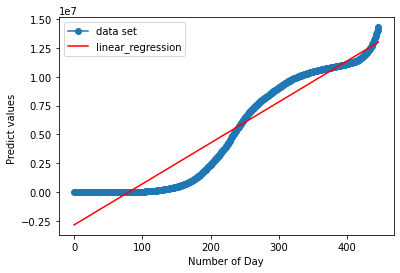

In [21]:
predicted1 = Linear_Regression.predict(a.values.reshape(-1,1))
predicted11 = Linear_Regression.predict(a.values.reshape(-1,1))
plt.plot(a, b, 'o-',label='data set')
plt.plot(a, predicted1,c='#ff0000',label='linear_regression')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict values ')
plt.show()



---


Here the data is displayed by exponential representation (linear_regression Curve Was Converted)

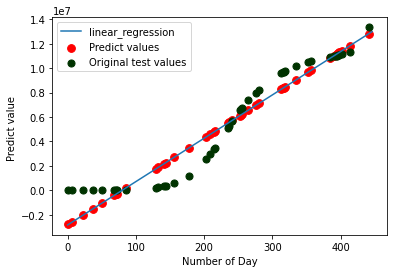

In [22]:
plt.plot(a, predicted11,label='linear_regression')
plt.scatter(X_test, evaluation_1 ,s=60, c='#ff0000',label='Predict values')
plt.scatter(X_test, y_test ,s=50, c='#003300',label='Original test values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value ')
plt.show()

In [23]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
std=StandardScaler()
#pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [24]:
lin_pred=Linear_Regression.predict(np.array(a).reshape(-1,1))
plt.figure(figsize=(11,6))

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=lin_pred,
                    mode='lines',name="Linear Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

 ## **Polynomial Regression** 

In [25]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 6) #6

  
scores = []
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(a):
    X_train, X_test, y_train, y_test= a[train_index], a[test_index], b[train_index], b[test_index]
    X_poly = poly.fit_transform(X_train.values.reshape(-1,1))
    lin2 = LinearRegression()
    lin2.fit(X_poly, y_train)
    scores.append(lin2.score(poly.fit_transform(X_test.values.reshape(-1,1)),y_test))
    

In [26]:
sum(scores)/len(scores)

0.9984758030563607

In [27]:
print('Evaluation for expecting 55 days in future in Linear_Regression:')
for predict in Z_pred:
  print('day',predict,'=',int(lin2.predict(poly.fit_transform([predict]))))

Evaluation for expecting 55 days in future in Linear_Regression:
day [446] = 14203308
day [447] = 14369019
day [448] = 14540589
day [449] = 14718156
day [450] = 14901862
day [451] = 15091849
day [452] = 15288262
day [453] = 15491248
day [454] = 15700955
day [455] = 15917534
day [456] = 16141138
day [457] = 16371921
day [458] = 16610040
day [459] = 16855654
day [460] = 17108924
day [461] = 17370013
day [462] = 17639086
day [463] = 17916310
day [464] = 18201854
day [465] = 18495891
day [466] = 18798593
day [467] = 19110137
day [468] = 19430700
day [469] = 19760463
day [470] = 20099609
day [471] = 20448322
day [472] = 20806789
day [473] = 21175200
day [474] = 21553746
day [475] = 21942621
day [476] = 22342022
day [477] = 22752146
day [478] = 23173196
day [479] = 23605374
day [480] = 24048886
day [481] = 24503940
day [482] = 24970748
day [483] = 25449521
day [484] = 25940476
day [485] = 26443830
day [486] = 26959804
day [487] = 27488622
day [488] = 28030508
day [489] = 28585691
day [490] =

**------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [29]:
comp_data=poly.fit_transform(np.array(a).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=lin2.predict(comp_data)
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

## **Decision** **Tree**

In [30]:
from sklearn.tree import tree
from sklearn.tree import DecisionTreeRegressor

3 features DT


In [31]:
df = pd.DataFrame(datewise, columns = ['Deaths','Days Since','Recovered'])
df_array = df.to_numpy()
type(df_array)

numpy.ndarray

In [32]:
X=df
dfy = pd.DataFrame(datewise, columns = ['Confirmed'])
dfy_array = dfy.to_numpy()

In [33]:
#X_prediction = [[417],[418],[419],[420],[421],[422]]
aa = np.array([182553,451,13276039])
aa = aa.reshape(1,-1)
bb = np.array([230168,466,17280844])
bb = bb.reshape(1,-1)


In [34]:
Decision_tree = tree.DecisionTreeRegressor()
yy=b
scores = []
######################################################################################################################
Decision_tree = DecisionTreeRegressor()
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(df_array):
    X_train, X_test, y_train, y_test= df_array[train_index], df_array[test_index], dfy_array[train_index], dfy_array[test_index]
    #X_train, X_test, y_train, y_test , yy_train, yy_test= a[train_index], a[test_index], b[train_index], b[test_index], yy[train_index], yy[test_index]
    Decision_tree.fit(X_train, y_train)
    scores.append(Decision_tree.score(X_test,y_test))
    
print("Average score for Decision Tree:",sum(scores)/len(scores))

Average score for Decision Tree: 0.99988863786316


In [35]:
#X_prediction = [[441],[442],[443],[444],[445],[446]]

In [36]:
Decision_tree.fit(df_array, dfy_array)

evaluation_5 =Decision_tree.predict(X_test)
score=Decision_tree.score(X_test, y_test)   
print("Final Evaluation Score for Decision Tree Regression :",score)

Final Evaluation Score for Decision Tree Regression : 1.0


In [37]:
print('Evaluation for expecting 6 days in future in SVR_Regression:')   #SVR Regressor 6
print('day 451','=',int(Decision_tree.predict(aa)))
print('day 466','=',int(Decision_tree.predict(bb)))

Evaluation for expecting 6 days in future in SVR_Regression:
day 451 = 14291917
day 466 = 14291917


## **SVR**

### Code & Validation

In [38]:
df = pd.DataFrame(datewise, columns = ['Deaths','Days Since','Recovered'])
df_array = df.to_numpy()
type(df_array)
#type(df)

numpy.ndarray

In [39]:
X=df
dfy = pd.DataFrame(datewise, columns = ['Confirmed'])
dfy_array = dfy.to_numpy()

In [40]:
scores_1 = []
scores_2 = []
scores_3 = []
scores_4 = []
scores_5 = []
scores_6 = []
"""
C = 331.99 degree= 3 kernel ="poly"    -------> Average score :0.8002390827501171
C = 331.99 degree= 3 kernel ="poly"    -------> Average score :0.8112666373821353
C = 3001.99 degree= 2 kernel ="poly"    -------> Average score : 0.916432692004831
C = 5000 degree= 2 kernel ="poly"    -------> Average score : 0.9246252337893296
C = 29999.99 degree= 2 kernel ="poly"    -------> Average score : 0.929753801305709

"""
######################################################################################################################
SVR_Regressor_1 = SVR(kernel='rbf')
SVR_Regressor_2 = SVR(kernel='poly',degree=5)
SVR_Regressor_3 = SVR(kernel='linear')
SVR_Regressor_4 = SVR(kernel='poly',degree=2)
SVR_Regressor_5 = SVR(kernel='poly',degree=7)
SVR_Regressor_6 = SVR(kernel='poly',degree=2,C=5000)
######################################################################################################################

# a =datewise['Days Since']
#b =datewise['Confirmed']

cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(df_array):
    X_train, X_test, y_train, y_test= df_array[train_index], df_array[test_index], dfy_array[train_index], dfy_array[test_index]
    #
    SVR_Regressor_1.fit(X_train, y_train)
    scores_1.append(SVR_Regressor_1.score(X_test, y_test))
    #
    SVR_Regressor_2.fit(X_train, y_train)
    scores_2.append(SVR_Regressor_2.score(X_test, y_test))
    #
    SVR_Regressor_4.fit(X_train, y_train)
    scores_4.append(SVR_Regressor_4.score(X_test, y_test))
    #
    SVR_Regressor_5.fit(X_train, y_train)
    scores_5.append(SVR_Regressor_5.score(X_test, y_test))
    #
    SVR_Regressor_6.fit(X_train, y_train)
    scores_6.append(SVR_Regressor_6.score(X_test, y_test))

print("Average score for SVR_Regressor_1:",sum(scores_1)/10,
      "\nAverage score for SVR_Regressor_2:",sum(scores_2)/10,
      "\nAverage score for SVR_Regressor_3:",sum(scores_3)/10,
      "\nAverage score for SVR_Regressor_4:",sum(scores_4)/10,
      "\nAverage score for SVR_Regressor_5:",sum(scores_5)/10, 
      "\nAverage score for SVR_Regressor_6:",sum(scores_6)/10)  


Average score for SVR_Regressor_1: -0.09168252749954534 
Average score for SVR_Regressor_2: -0.08222551795772028 
Average score for SVR_Regressor_3: 0.0 
Average score for SVR_Regressor_4: -0.09142516580326507 
Average score for SVR_Regressor_5: 0.006537431406693351 
Average score for SVR_Regressor_6: 0.800794823897186


**After the validation we chosed best parameter for SVR (SVR_Regressor_6) to evaluate:**

### Evaluation

In [41]:
#SVR_Regressor 6
SVR_Regressor_6.fit(df_array, dfy_array)

evaluation_2 =SVR_Regressor_6.predict(df_array)
score=SVR_Regressor_6.score(df_array, dfy_array)  
print("Final Evaluation Score for SVR Regression :",score)

Final Evaluation Score for SVR Regression : 0.8409975070661012


### Prediction for new days

In [42]:
#deaths , days since, recovered

aa = np.array([174308,441,12547866])
bb = np.array([192311,450,14085110])
cc = np.array([230168,486,17280844])

bb = bb.reshape(1,-1)
aa = aa.reshape(1,-1)
cc = cc.reshape(1,-1)

In [43]:
#SVR Regressor 3
print('day 441 =',int(SVR_Regressor_6.predict(aa)), 'real value = 14291917')
print('day 445 =',int(SVR_Regressor_6.predict(bb)), 'real value = 16960172')
print('day 486 =',int(SVR_Regressor_6.predict(cc)), 'real value = 21077410')

day 441 = 13910945 real value = 14291917
day 445 = 16754124 real value = 16960172
day 486 = 23715096 real value = 21077410


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------**

## **MLPRegressor**

### Code & Validation

In [44]:
from sklearn.neural_network import MLPRegressor

In [45]:
scores_1 = []
scores_2 = []
scores_3 = []
scores_4 = []
scores_5 = []
######################################################################################################################
MLP_Regressor_1 = MLPRegressor(hidden_layer_sizes=(4), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=120, validation_fraction=0.1)
MLP_Regressor_2 = MLPRegressor(hidden_layer_sizes=(1), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=120, validation_fraction=0.1)
MLP_Regressor_3 = MLPRegressor(hidden_layer_sizes=(1), activation='tanh', solver='lbfgs' ,learning_rate_init=0.3, max_iter=1000,random_state=120, validation_fraction=0.2)
MLP_Regressor_4 = MLPRegressor(hidden_layer_sizes=(9), activation='relu', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=1, validation_fraction=0.1)
MLP_Regressor_5 = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='sgd' ,learning_rate_init=0.01, max_iter=1000,random_state=1, validation_fraction=0.1)
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(df_array):
    X_train, X_test, y_train, y_test ,yy_train, yy_test= df_array[train_index], df_array[test_index], dfy_array[train_index], dfy_array[test_index], yy[train_index], yy[test_index]
    #
    MLP_Regressor_1.fit(X_train, y_train)
    scores_1.append(MLP_Regressor_1.score(X_test,y_test))
    #
    MLP_Regressor_2.fit(X_train, y_train)
    scores_2.append(MLP_Regressor_2.score(X_test,y_test))
    #
    MLP_Regressor_3.fit(X_train, y_train)
    scores_3.append(MLP_Regressor_3.score(X_test,y_test))
     #
    MLP_Regressor_4.fit(X_train, y_train)
    scores_4.append(MLP_Regressor_4.score(X_test,y_test))
    #
    MLP_Regressor_5.fit(X_train, y_train)
    scores_5.append(MLP_Regressor_5.score(X_test,y_test))

print("Average score for MLP_Regressor_1:",sum(scores_1)/10,"\nAverage score for MLP_Regressor_2:",sum(scores_2)/10,"\nAverage score for MLP_Regressor_3:",sum(scores_3)/10
      ,"\nAverage score for MLP_Regressor_4:",sum(scores_4)/10,"\nAverage score for MLP_Regressor_5:",sum(scores_5)/10)    


Average score for MLP_Regressor_1: 0.3829642251670224 
Average score for MLP_Regressor_2: 0.18261794608613655 
Average score for MLP_Regressor_3: 0.18261794608613655 
Average score for MLP_Regressor_4: 0.9982956403975081 
Average score for MLP_Regressor_5: 0.03319152317189903


**After the validation we chosed best parameter for MLP (MLP_Regressor_4) to evaluate:**

### Evaluation

In [46]:
MLP_Regressor = MLP_Regressor_4
MLP_Regressor.fit(X_train, y_train)
y_test_log=np.log10(y_test)
evaluation_3 =MLP_Regressor.predict(X_test)
score=MLP_Regressor.score(X_test, y_test)   
print("Final Evaluation Score for MLP_Regressor :",score)

Final Evaluation Score for MLP_Regressor : 0.9982410324494299


### Prediction for new days

In [47]:
#X_prediction = [[417],[418],[419],[420],[421],[422]]

In [48]:
print('Evaluation for expecting 6 days in future in SVR_Regression:')   #SVR Regressor 3
aa = aa.reshape(1,-1)
print('day',predict,'=',int(SVR_Regressor_6.predict(aa)))

Evaluation for expecting 6 days in future in SVR_Regression:
day [499] = 13910945


In [49]:
MLP_Regressor_7 = MLPRegressor(hidden_layer_sizes=(10), activation='relu', solver='lbfgs' ,learning_rate_init=20, max_iter=1000,random_state=20, validation_fraction=0.2)
MLP_Regressor_7.fit(X_train, y_train)
MLP_Regressor_7.score(X_test,y_test)

0.9990357631862012

In [50]:
print('Evaluation for expecting 6 days in future in MLP_Regressor:')
print('day',predict,'=',int(MLP_Regressor_7.predict(aa)))

Evaluation for expecting 6 days in future in MLP_Regressor:
day [499] = 13431192


**------------------------------------------------------------------------------------------------------------------------**